In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("books_clean.csv")
df.head(5)

,title,price,stock,rating,category
0,A Light in the Attic,51.77,22,3,Poetry
1,Tipping the Velvet,53.74,20,1,Historical Fiction
2,Soumission,50.10,20,1,Fiction
3,Sharp Objects,47.82,20,4,Mystery
4,Sapiens: A Brief History of Humankind,54.23,20,5,History


In [3]:
# Simple Linear Regression: Predict Price from Rating

X = df[['rating']]   # independent variable
y = df['price']      # dependent variable

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient (Rating effect on Price):", model.coef_[0])

Intercept: 34.24148437268329
Coefficient (Rating effect on Price): 0.2835667558387639


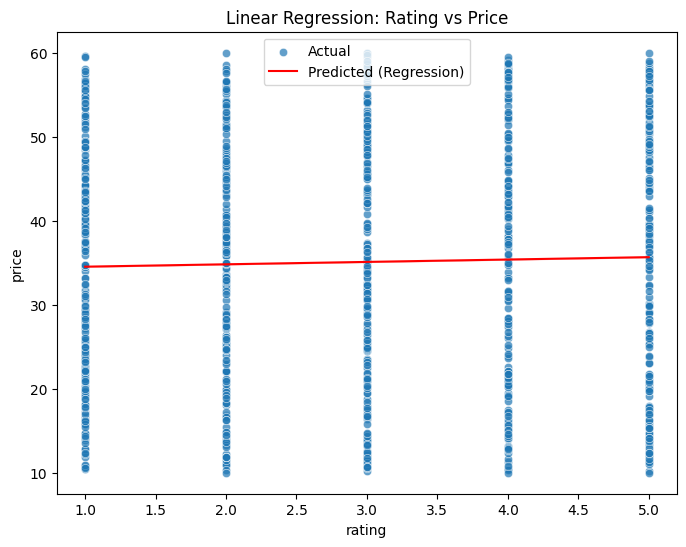

In [4]:
# Predict prices for each rating
df['predicted_price'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x="rating", y="price", data=df, alpha=0.7, label="Actual")
sns.lineplot(x="rating", y="predicted_price", data=df, color="red", label="Predicted (Regression)")
plt.title("Linear Regression: Rating vs Price")
plt.show()

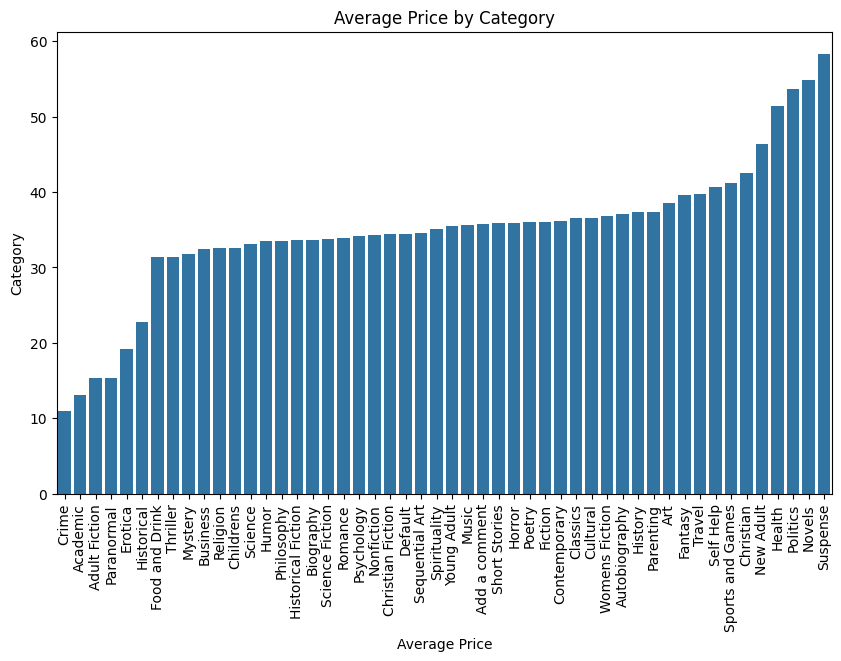

In [5]:
# Patterns in Category Pricing

avg_price_category = df.groupby("category")['price'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_category.index, y=avg_price_category.values)
plt.xticks(rotation=90)
plt.title("Average Price by Category")
plt.xlabel("Average Price")
plt.ylabel("Category")
plt.show()

In [6]:
# Basic Recommendation System
# Recommend books with similar rating & price

from sklearn.metrics.pairwise import cosine_similarity

features = df[['price', 'rating']]
similarity_matrix = cosine_similarity(features)

# Recommend 5 similar books to the first book
book_index = 0
similar_indices = similarity_matrix[book_index].argsort()[::-1][1:6]

print("Target Book:", df.iloc[book_index]['title'])
print("Recommended Books:")
print(df.iloc[similar_indices][['title','price','rating','category']])

Target Book: A Light in the Attic
Recommended Books:
                                                 title  price  rating  \
157                                The Genius of Birds  17.24       1   
518                                 Raymie Nightingale  34.41       2   
905                                      When I'm Gone  51.96       3   
339                Angels & Demons (Robert Langdon #1)  51.48       3   
275  Overload: How to Unplug, Unwind, and Unleash Y...  52.15       3   

       category  
157  Nonfiction  
518   Childrens  
905     Fiction  
339     Default  
275   Self Help  


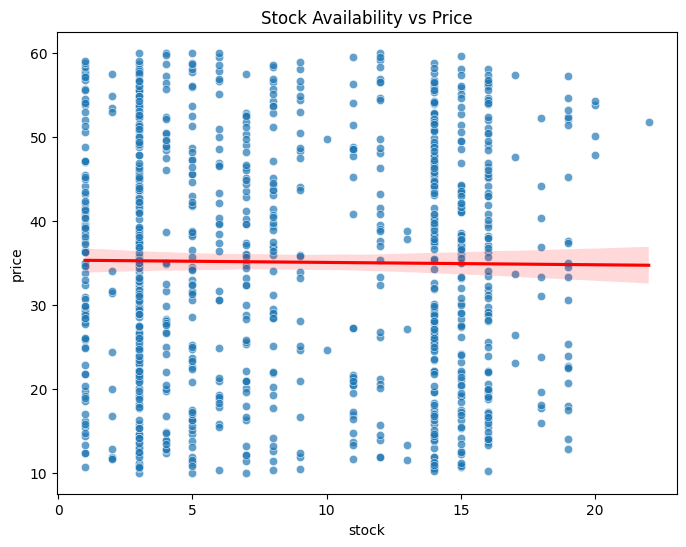

Correlation between Stock and Price: -0.010914066796795106


In [7]:
# Stock Availability vs Pricing

plt.figure(figsize=(8,6))
sns.scatterplot(x="stock", y="price", data=df, alpha=0.7)
sns.regplot(x="stock", y="price", data=df, scatter=False, color="red")
plt.title("Stock Availability vs Price")
plt.show()

correlation_stock_price = df[['stock','price']].corr().iloc[0,1]
print("Correlation between Stock and Price:", correlation_stock_price)